# -------------------------------숫자 이미지--------------------------------

# 1. 모듈 불러오기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 2. 데이터 준비

- 정답지인 'target' 칼럼이 있으므로 '지도학습'방법이 사용 가능함을 확인
- 이미지의 값을 학습시켜 옳은 값인지 확인 하는 방법을 사용함으로 '분류'모델을 사용함을 확인

- 가설: 해당 손글씨 이미지가 문자인지 숫자인지를 판별


In [2]:
load = load_digits()
print(dir(load)) # 변수와 매서드 확인
load.keys() # 키 값 확인 

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

# 3. 데이터 이해하기

- 데이터 키 값을 확인한 결과 학습용 'data' 칼럼과 정답지인 'target' 칼럼이 있음을 확인 
- describe를 통해 총 데이터 수는 1797개 feature는 64개가 있으며 8*8 크기의 이미지를 가지고 있음을 확인

In [3]:
load.target_names # 타겟 이름 확인
print(load.DESCR) # 데이터 상세설명

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
# 데이터 저장 및 확인 
load_data = load.data
load_label = load.target

print(load_data.shape)
print(load_data, '\n\n')

print(load_label.shape)
print(load_label)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 


(1797,)
[0 1 2 ... 8 9 8]


- matplotlib을 통해 시각적으로 1~9까지 숫자를 나타내고 있음을 1차 확인
- 정답지인 load_label를 set함수를 통해 1~9까지 숫자의 값을 가지고 있음을 확인

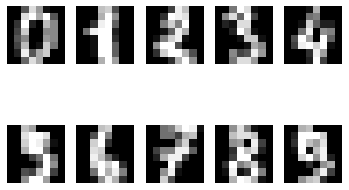

In [5]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.subplot(2, 5, i+1) # 2*5의 도화지 생성 및 위치값(i+1)로 지정
    plt.imshow(load_data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [6]:
set(load_label)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

- collections 함수를 통해 정답지의 분포가 치우쳐져 있지 않고 고르게 되어 있음을 확인

In [7]:
import collections
collections.Counter(load_label)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

# 4. train, test 데이터 분리

In [8]:
import pandas as pd
# pandas.DataFrame에 저장
load_df = pd.DataFrame(data=load_data, columns=load.feature_names)

# 정답지인 label 컬럼 추가
load_df['label'] = load.target

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(load_data, load_label, test_size = 0.25, random_state = 35)

# 나누기 확인
print('X_train 개수:', len(X_train), 'X_test 개수:', len(X_test))

X_train 개수: 1347 X_test 개수: 450


- 25:75로 나눈값의 비율의 값을 재확인
- 각 train값과 test값의 모형을 확인

In [10]:
print('총 데이터:',len(load_data))
print(len(load_data) * 0.25)
print(len(load_data) * 0.75)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

총 데이터: 1797
449.25
1347.75
(1347, 64) (1347,)
(450, 64) (450,)


# 5. 다양한 모델 학습해보기
- 각 모델들의 정밀도와 F1-Score 비교를 통한 최적의 모델을 찾기

Decision Tree 

In [11]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=27)
print(decision_tree._estimator_type)

# 모델 학습하기
decision_tree.fit(X_train, y_train)

# test 데이터로 모델 학습
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_pred

# 수치비교
from sklearn.metrics import classification_report
print(classification_report(y_test, decision_tree_pred))

decision_tree_result = classification_report(y_test, decision_tree_pred, output_dict=True)


classifier
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        44
           1       0.80      0.88      0.84        41
           2       0.76      0.91      0.83        43
           3       0.85      0.81      0.83        48
           4       0.83      0.79      0.81        48
           5       0.82      0.86      0.84        49
           6       1.00      0.98      0.99        47
           7       0.83      0.86      0.84        44
           8       0.72      0.76      0.74        34
           9       0.88      0.73      0.80        52

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450



Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=27)
print(RandomForestClassifier._estimator_type)

# 모델 학습하기
RF.fit(X_train, y_train)

# test 데이터로 모델 학습
RF_pred = RF.predict(X_test)
RF_pred

# 수치비교
print(classification_report(y_test, RF_pred))
RF_result = classification_report(y_test, RF_pred,output_dict=True)


classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.93      1.00      0.96        41
           2       1.00      1.00      1.00        43
           3       0.96      0.98      0.97        48
           4       0.98      0.94      0.96        48
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        47
           7       0.96      1.00      0.98        44
           8       0.91      0.88      0.90        34
           9       1.00      0.96      0.98        52

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



SVM

In [13]:
from sklearn import svm
svm_model = svm.SVC()

# 모델 학습하기
svm_model.fit(X_train, y_train)

# test 데이터로 모델 학습
svm_model_pred = svm_model.predict(X_test)

# 수치비교
print(classification_report(y_test,svm_model_pred))
# print(classification_report(y_test,svm_model_pred, output_dict=True))
svm_result = classification_report(y_test,svm_model_pred, output_dict=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.95      1.00      0.98        41
           2       1.00      1.00      1.00        43
           3       1.00      0.98      0.99        48
           4       1.00      0.96      0.98        48
           5       0.98      0.98      0.98        49
           6       1.00      1.00      1.00        47
           7       0.98      1.00      0.99        44
           8       0.91      0.94      0.93        34
           9       0.98      0.96      0.97        52

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



확률적 경사 하강법

In [14]:
# 모델 불러오기 및 변수에 모델 저장
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)

# 모델 학습하기
sgd_model.fit(X_train,y_train)

# test 데이터로 모델 학습
sgd_model_pred = sgd_model.predict(X_test)

# 수치비교
print(classification_report(y_test,sgd_model_pred))

# 결과를 시각적으로 보기 위한 딕셔너리 값 변환
sgd_result = classification_report(y_test,sgd_model_pred,output_dict= True)

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.91      0.78      0.84        41
           2       1.00      1.00      1.00        43
           3       0.91      0.85      0.88        48
           4       1.00      0.94      0.97        48
           5       0.92      1.00      0.96        49
           6       1.00      1.00      1.00        47
           7       0.98      0.98      0.98        44
           8       0.67      0.94      0.78        34
           9       0.93      0.83      0.88        52

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.94      0.93      0.93       450



로지스틱 회귀분석

In [15]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=10000)

print(logistic_model._estimator_type)

logistic_model.fit(X_train,y_train)
logistic_model_pred = logistic_model.predict(X_test)

print(classification_report(y_test,logistic_model_pred))

logistic_result = classification_report(y_test,logistic_model_pred, output_dict= True)

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.93      0.95      0.94        41
           2       0.98      1.00      0.99        43
           3       1.00      0.98      0.99        48
           4       0.96      0.94      0.95        48
           5       0.96      0.94      0.95        49
           6       1.00      1.00      1.00        47
           7       0.98      1.00      0.99        44
           8       0.83      0.88      0.86        34
           9       0.96      0.92      0.94        52

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



# 6. 모델 성능 평가해보기

In [16]:
precision = []
recall = []
f1_score = []
support = []

precision.append(decision_tree_result['macro avg']['precision'])
precision.append(RF_result['macro avg']['precision'])
precision.append(svm_result['macro avg']['precision'])
precision.append(logistic_result['macro avg']['precision'])
precision.append(sgd_result['macro avg']['precision'])

recall.append(decision_tree_result['macro avg']['recall'])
recall.append(RF_result['macro avg']['recall'])
recall.append(svm_result['macro avg']['recall'])
recall.append(logistic_result['macro avg']['recall'])
recall.append(sgd_result['macro avg']['recall'])

f1_score.append(decision_tree_result['macro avg']['f1-score'])
f1_score.append(RF_result['macro avg']['f1-score'])
f1_score.append(svm_result['macro avg']['f1-score'])
f1_score.append(logistic_result['macro avg']['f1-score'])
f1_score.append(sgd_result['macro avg']['f1-score'])

support.append(decision_tree_result['macro avg']['support'])
support.append(RF_result['macro avg']['support'])
support.append(svm_result['macro avg']['support'])
support.append(logistic_result['macro avg']['support'])
support.append(sgd_result['macro avg']['support'])

Text(0.5, 1.0, 'support')

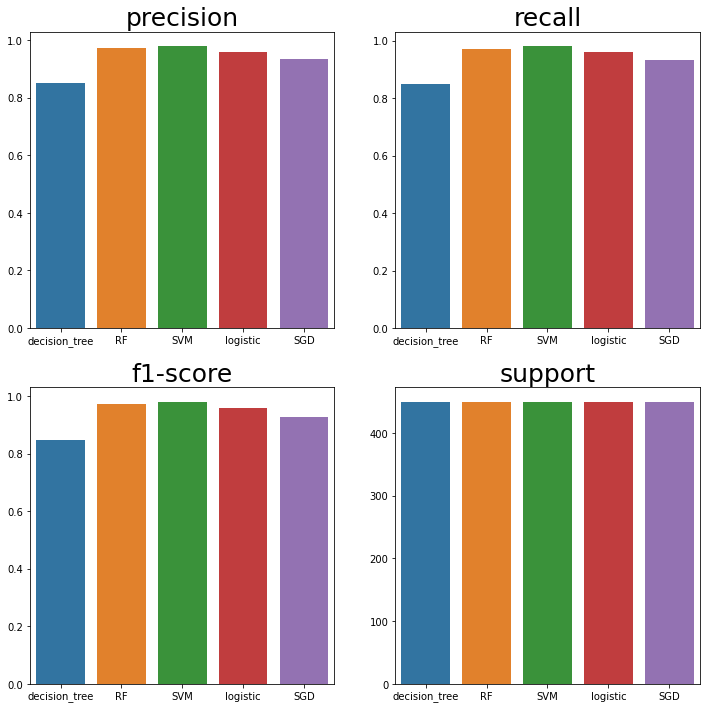

In [17]:
import seaborn as sns
name = ['decision_tree','RF','SVM','logistic','SGD']
f , ax = plt.subplots(2,2, figsize = (12,12))


sns.barplot(x=name,y=precision, ax=ax[0,0])
ax[0,0].set_title('precision', size=25)

sns.barplot(x=name,y=recall,ax=ax[0,1])
ax[0,1].set_title('recall', size=25)

sns.barplot(x=name,y=f1_score,ax=ax[1,0])
ax[1,0].set_title('f1-score', size=25)

sns.barplot(x=name,y=support,ax=ax[1,1])
ax[1,1].set_title('support', size=25)

# 결론

데이터 셋이 균등한 분포를 가지고 있기 때문에 정확도로만 판단했을때는 ***svm***이 가장 높은 정확도를 가지고 있음

### +추가)
클래스별 샘플 수로 가중치를 두는 ***weigthed avg***보다 
클래스를 같은 비중으로 다루는 ***macro avg***가 적절하다고 판단

해당 모델은 숫자 이미지를 보고 숫자를 판별(예측)하는것이 얼마나 정확한지 알아보는 것이 중요하기 때문에 
***precision***을 확인하는 것이 적절하다고 판단

balance한 데이터이기 때문에 각 값들에 있어서 시각적인 차이는 두드러지지 않는다 
다만, decision_tree의 경우 타 값들 보다 전반적으로 아래에 있음을 확인할 수 있으며
svm의 경우 각 지표에서 가장 높은 값을 가지고 있어

해당 가설을 해결하는데 있어서 최적의 모델은 ***svm***이라고 생각됨

# -----------------------------숫자 이미지 종료------------------------------

# -------------------------------와인 데이터--------------------------------

# 1. 모듈 불러오기

In [18]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import pandas as pd
import numpy as np

# 2. 데이터 준비



In [19]:
wine = load_wine()
print(dir(wine)) # 변수와 매서드 확인
wine.keys()

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

# 3. 데이터 이해하기

총 데이터 수는 178개와 13의 feature를 가지고 있음
target데이터에는 0,1,2로만 가지고 있는걸로 보아 각각의 0은 class_0 / 1은 class_1 / 2은 class_2로 정답지를 구성

- 정답지인 'target' 칼럼이 있으므로 '지도학습'방법이 사용 가능
- 와인의 속성값을 학습 후 어떤 class의 와인인지 '분류'하는 방법 



In [20]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### 데이터 이해를 위한 feature_name 해석
- alcohol : 도수
- malic_acid : 말산(신맛에 기여)
- ash : 재
- alcalinity_of_ash : 재의 알칼리성
- magnesium : 마그네슘
- total_phenols : 총 페놀
- flavanoids : 플라바노이드
- nonflavvanoid_phenols : 비플라바노이드 페놀
- proanthocyanins : 프로안토시아닌
- color_intensity : 색 강도
- hue : 색조
- ~ of diluted wines: 희석된 와인의 ~~
- priline : 프롤린

In [21]:
# 데이터 저장 및 확인
wine_data = wine.data 
wine_target = wine.target

print(wine_data.shape)
print(wine_data)
print(wine_target.shape)
print(wine_target)

print(wine.target_names) # 타겟 이름 확인 
print(wine.feature_names) 

(178, 13)
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
(178,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_o

In [22]:
# data와 feature_names을 데이터 프레임에 저장
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df['target'] = wine.target # 기존 데이터 프레임에 타겟 칼럼 추가

print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

# 4. train, test 데이터 분리

In [23]:
# 라이브러리 불러오기 
from sklearn.model_selection import train_test_split

# 데이터 분리 
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target, test_size = 0.3, random_state = 5)

# 나누기 확인
print('X_train 개수:', len(X_train), 'X_test 개수:', len(X_test))

X_train 개수: 124 X_test 개수: 54


# 5. 다양한 모델로 학습시켜보기

- 의사결정트리

In [24]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=12)
print(decision_tree._estimator_type)

# 모델 학습하기
decision_tree.fit(X_train, y_train)

# test 데이터로 모델 학습
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_pred

# 수치비교
from sklearn.metrics import classification_report
print(classification_report(y_test, decision_tree_pred))

classifier
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.89      0.89      0.89        18
           2       0.93      1.00      0.96        13

    accuracy                           0.93        54
   macro avg       0.92      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



- 랜덤포레스트

In [25]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=12)
print(RandomForestClassifier._estimator_type)

# 모델 학습하기
RF.fit(X_train, y_train)

# test 데이터로 모델 학습
RF_pred = RF.predict(X_test)
RF_pred

# 수치비교
print(classification_report(y_test, RF_pred))


classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



- 서포트벡터머신

In [26]:
from sklearn import svm
svm_model = svm.SVC()

# 모델 학습하기
svm_model.fit(X_train, y_train)

# test 데이터로 모델 학습
svm_model_pred = svm_model.predict(X_test)

# 수치비교
print(classification_report(y_test,svm_model_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.60      0.83      0.70        18
           2       0.40      0.31      0.35        13

    accuracy                           0.67        54
   macro avg       0.63      0.63      0.62        54
weighted avg       0.68      0.67      0.66        54



- 확률적 경사 하강법

In [61]:
# 모델 불러오기 및 변수에 모델 저장
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)

# 모델 학습하기
sgd_model.fit(X_train,y_train)

# test 데이터로 모델 학습
sgd_model_pred = sgd_model.predict(X_test)

# 수치비교
print(classification_report(y_test,sgd_model_pred,zero_division=0))

classifier
              precision    recall  f1-score   support

           0       0.96      0.69      0.80        70
           1       0.82      0.98      0.89       101

    accuracy                           0.86       171
   macro avg       0.89      0.83      0.85       171
weighted avg       0.88      0.86      0.85       171



- 로지스틱 회귀분석

In [28]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=10000)
print(logistic_model._estimator_type)

# 모델 학습하기
logistic_model.fit(X_train,y_train)

# test 데이터로 모델 학습
logistic_model_pred = logistic_model.predict(X_test)

# 수치비교
print(classification_report(y_test,logistic_model_pred))


classifier
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.89      0.94      0.92        18
           2       0.92      0.92      0.92        13

    accuracy                           0.94        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



# 6. 모델 성능 평가해보기

- wine 데이터는 와인의 종류를 구분하는 문제이기 때문에 오차행렬에서 정확도를 보는 것이 중요하다고 생각됨

In [62]:
# 모델별 성능 딕셔너리화
decision_tree_result = classification_report(y_test, decision_tree_pred, output_dict=True)
RF_result = classification_report(y_test, RF_pred,output_dict=True)
svm_result = classification_report(y_test,svm_model_pred, output_dict=True)
sgd_result = classification_report(y_test,sgd_model_pred,output_dict= True)
logistic_result = classification_report(y_test,logistic_model_pred, output_dict= True)


In [30]:
# 모델별 정확도 지표만 추출 
accuracy = []
name = ['decision_tree','RF','SVM','logistic','SGD']

accuracy.append(decision_tree_result['accuracy'])
accuracy.append(RF_result['accuracy'])
accuracy.append(svm_result['accuracy'])
accuracy.append(sgd_result['accuracy'])
accuracy.append(logistic_result['accuracy'])


정확도를 기준으로 했을 때에는  

logistic -> SVM -> SGD -> decision_tree -> RF  

순서이며 랜덤포레스트가 가정 적합하다

Text(0.5, 1.0, 'accuracy')

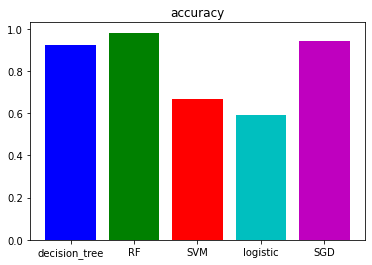

In [31]:
# 정확도를 기준으로 시각화
import matplotlib.pyplot as plt
plt.bar(name, accuracy, color = ['b','g','r','c','m'])
plt.title('accuracy')

# -----------------------------와인 데이터 종료------------------------------

# ------------------------------유방암 데이터-------------------------------

# 1. 모듈 불러오기

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# 2. 데이터 준비

In [33]:
cancer = load_breast_cancer()
print(dir(cancer)) # 변수와 매서드 확인
cancer.keys() # 키 값 확인

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

- target 과 target_names를 확인한 결과 'malignant(악성)' 'benign(양성)'를 0과 1로 분류되어 있음

In [34]:
print(cancer.feature_names)
print(cancer.target)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0

- 전체 데이터의 개수는 569개이며, 30개의 데이터 특성(변수)를 가지고 있음

In [35]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# 3. 데이터 이해하기

- 정답을 학습하는 '지도학습'이면서 암에 대한 '정확한 예측'이 필요한 데이터 셋

In [36]:
# 데이터 저장 및 확인
import collections
collections.Counter(cancer.target)

cancer_data = cancer.data
cancer_target = cancer.target

print('전체 데이터(행) 개수:',cancer_data.shape[0])
print('전체 특성(열) 개수:',cancer_data.shape[1])
print('타겟 데이터 개수:',cancer_target.shape)
print('타겟 데이터 레이블명:',cancer.target_names)
print('malignant(악성) 개수:',collections.Counter(cancer.target)[0])
print('benign(양성) 개수:',collections.Counter(cancer.target)[1])

전체 데이터(행) 개수: 569
전체 특성(열) 개수: 30
타겟 데이터 개수: (569,)
타겟 데이터 레이블명: ['malignant' 'benign']
malignant(악성) 개수: 212
benign(양성) 개수: 357


In [37]:
# 데이터 프레임에 저장
cancer_df = pd.DataFrame(data = cancer_data, columns= cancer.feature_names)

# 정답지인 target 칼럼 추가
cancer_df['target'] = cancer.target
print(cancer_df.head(1))

# 컬럼이 이전 30개에서 31개로 증가했음으로 target데이터가 들어갔음을 확인

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0           0.1184   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0            0.2776          0.3001               0.1471         0.2419   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   

   worst symmetry  worst fractal dimension  target  
0          0.4601                   0.1189       0  

[1 rows x 31 columns]


In [38]:
cancer_df.describe() # 데이터의 최대,최소,평균 등 확인

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# 4. train, test 데이터 분리

In [39]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_target, test_size = 0.3 , random_state = 18)

# 나누기 확인
print('X_train 개수:', len(X_train), 'X_test 개수:', len(X_test))

X_train 개수: 398 X_test 개수: 171


# 5. 다양한 모델 학습해보기
- 유방암 데이터 셋의 경우 암에 대한 예측 여부(신뢰성)가 중요함
- 분류의 성능평가지표는 정밀도가 높은 모델이 정확도가 높은 모델

##### 의사결정트리

In [40]:
# 라이브러리 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

decision_tree = DecisionTreeClassifier(random_state=8)
print(decision_tree._estimator_type)

# 모델 학습하기
decision_tree.fit(X_train, y_train)

# test 데이터로 모델 학습
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_pred

# 수치비교
print(classification_report(y_test, decision_tree_pred))

classifier
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        70
           1       0.89      0.96      0.92       101

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



##### 랜덤포레스트

In [41]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=27)
print(RandomForestClassifier._estimator_type)

# 모델 학습하기
RF.fit(X_train, y_train)

# test 데이터로 모델 학습
RF_pred = RF.predict(X_test)
RF_pred

# 수치비교
print(classification_report(y_test, RF_pred))


classifier
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        70
           1       0.93      0.99      0.96       101

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



##### 서포트 벡터 머신

In [42]:
from sklearn import svm
svm_model = svm.SVC()

# 모델 학습하기
svm_model.fit(X_train, y_train)

# test 데이터로 모델 학습
svm_model_pred = svm_model.predict(X_test)

# 수치비교
print(classification_report(y_test,svm_model_pred))

              precision    recall  f1-score   support

           0       0.98      0.67      0.80        70
           1       0.81      0.99      0.89       101

    accuracy                           0.86       171
   macro avg       0.90      0.83      0.84       171
weighted avg       0.88      0.86      0.85       171



##### 확률적 경사하강법

In [43]:
# 모델 불러오기 및 변수에 모델 저장
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)

# 모델 학습하기
sgd_model.fit(X_train,y_train)

# test 데이터로 모델 학습
sgd_model_pred = sgd_model.predict(X_test)

# 수치비교
print(classification_report(y_test,sgd_model_pred))


classifier
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        70
           1       0.90      0.92      0.91       101

    accuracy                           0.89       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.89      0.89      0.89       171



##### 로지스틱 회귀분석

In [44]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=10000)

print(logistic_model._estimator_type)

# 모델 학습하기
logistic_model.fit(X_train,y_train)

# test 데이터로 모델 학습
logistic_model_pred = logistic_model.predict(X_test)

# 수치비교
print(classification_report(y_test,logistic_model_pred))

classifier
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        70
           1       0.92      0.96      0.94       101

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



# 6. 모델 성능 평가해보기

- 암을 진단할때, 음성을 양성으로 진단하는것 보다 양성을 음성으로 진단하는 것이 더 큰 문제가 되므로  
그러므로 거짓음성(FN)을 낮추는데 집중을 해야함 따라서, recall값으로 모델을 평가


In [45]:
# 모델별 성능 딕셔너리화
decision_tree_result = classification_report(y_test, decision_tree_pred, output_dict=True)
RF_result = classification_report(y_test, RF_pred,output_dict=True)
svm_result = classification_report(y_test,svm_model_pred, output_dict=True)
sgd_result = classification_report(y_test,sgd_model_pred,output_dict= True)
logistic_result = classification_report(y_test,logistic_model_pred, output_dict= True)


In [46]:
# 각 모델별 recall 값만 저장
recall = []
name = ['decision_tree','RF','SVM','logistic','SGD']

recall.append(decision_tree_result['macro avg']['recall'])
recall.append(RF_result['macro avg']['recall'])
recall.append(svm_result['macro avg']['recall'])
recall.append(logistic_result['macro avg']['recall'])
recall.append(sgd_result['macro avg']['recall'])

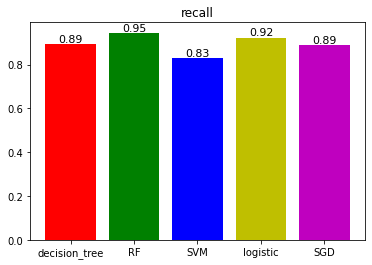

In [47]:
# recall를 기준으로 시각화
import matplotlib.pyplot as plt
plt.bar(name, recall, color = ['r','g','b','y','m'])
plt.title('recall')

for i, v in enumerate(name):
    plt.text(v, recall[i], '%0.2f' %recall[i],       # 좌표 (x축,y축, 표시)
             fontsize = 11,                           # 표시값 앞에 소수점 자리수 지정 
             color='black',
             ha='center',  # horizontalalignment (left, center, right)
             va='bottom')    # verticalalignment (top, center, bottom)

recall을 기준으로 하였을 때는 랜덤포레스트가 가장 예측 정확도가 높은 모델이라 볼 수 있음

# 추가)
### 이진 분류의 경우 각 모델별 ROC곡선과 AUC값을 확인해 성능을 평가
- 의학 분야에서 많이 사용
- ROC 곡선의 하단의 넓이를 AUC값으로 나타내며 0.5부터 1까지의 범위를 가짐
- 1에 가까울 수록 정확도가 높은 모델

##### 의사결정트리

In [48]:
from sklearn.metrics import roc_curve

# predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1사이의 값으로 돌려줌 / 해당 함수를 사용해 클래스 레이블(정답)을 예측
# 레이블 값이 1일 떄, 예측확률을 추출
pred_decision_target = decision_tree.predict_proba(X_test)[:,1]
pred_decision_target

# FPR(1 - 특이도(실제음성비율)) TPR(민감도:실제 양성 비율) 임계값 설정
fprs, tprs, thresholds = roc_curve(y_test, pred_decision_target)
print("반환된 분류 결정 임곗값 배열의 shape : ", thresholds.shape)

# 반환된 임계값 배열 row를 샘플로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기위해 np.arange는 1부터 시작
thr_index = np.arange(1,thresholds.shape[0])
pd.DataFrame({'index':thr_index,'FPR':fprs[thr_index],'TPR':tprs[thr_index]})

반환된 분류 결정 임곗값 배열의 shape :  (3,)


,index,FPR,TPR
0,1,0.171429,0.960396
1,2,1.000000,1.000000


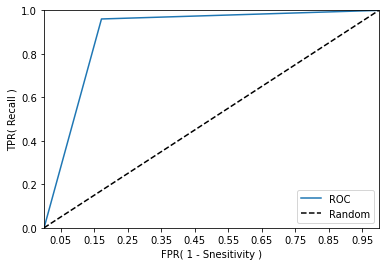

In [49]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--',label='Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2)) # x축의 눈금 범위
    plt.xlim(0, 1) # x축 시작값과 끝값
    plt.ylim(0, 1) # y축 시작값과 끝값
    plt.xlabel('FPR( 1 - Snesitivity )') # x축 레이블명
    plt.ylabel('TPR( Recall )') # y축 레이블명
    plt.legend() # 범례
    
roc_curve_plot(y_test, pred_decision_target)

In [50]:
from sklearn.metrics import roc_auc_score

pred_proba_tree = decision_tree.predict_proba(X_test)[:, 1]
roc_score_tree = roc_auc_score(y_test, pred_proba_tree)
print('ROC AUC Score: ', roc_score_tree)

ROC AUC Score:  0.8944837340876944


##### 랜덤포레스트

In [51]:
pd.DataFrame({'index':thr_index,'FPR':fprs[thr_index],'TPR':tprs[thr_index]})

,index,FPR,TPR
0,1,0.171429,0.960396
1,2,1.000000,1.000000


반환된 분류 결정 임곗값 배열의 shape :  (33,)


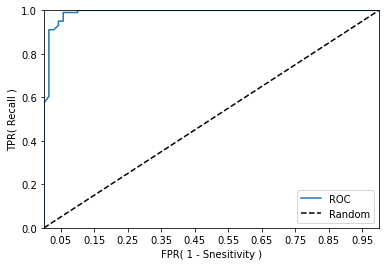

In [52]:
from sklearn.metrics import roc_curve

# predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1사이의 값으로 돌려줌 / 해당 함수를 사용해 클래스 레이블(정답)을 예측
# 레이블 값이 1일 떄, 예측확률을 추출
pred_RF_target = RF.predict_proba(X_test)[:,1]
pred_RF_target

# FPR(1 - 특이도(실제음성비율)) TPR(민감도:실제 양성 비율) 임계값 설정
fprs, tprs, thresholds = roc_curve(y_test, pred_RF_target)
print("반환된 분류 결정 임곗값 배열의 shape : ", thresholds.shape)

# 반환된 임계값 배열 row를 샘플로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기위해 np.arange는 1부터 시작
thr_index = np.arange(1,thresholds.shape[0])
pd.DataFrame({'index':thr_index,'FPR':fprs[thr_index],'TPR':tprs[thr_index]})

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--',label='Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2)) # x축의 눈금 범위
    plt.xlim(0, 1) # x축 시작값과 끝값
    plt.ylim(0, 1) # y축 시작값과 끝값
    plt.xlabel('FPR( 1 - Snesitivity )') # x축 레이블명
    plt.ylabel('TPR( Recall )') # y축 레이블명
    plt.legend() # 범례
    
roc_curve_plot(y_test, pred_RF_target)

In [53]:
from sklearn.metrics import roc_auc_score

pred_proba_rf = RF.predict_proba(X_test)[:, 1]
roc_score_rf = roc_auc_score(y_test, pred_proba_rf)
print('ROC AUC Score: ', roc_score_rf)

ROC AUC Score:  0.9905940594059407


##### 서포트벡터머신

반환된 분류 결정 임곗값 배열의 shape :  (26,)


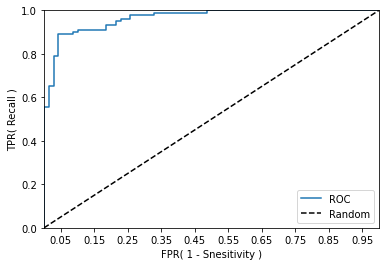

In [54]:
from sklearn.metrics import roc_curve

# predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1사이의 값으로 돌려줌 / 해당 함수를 사용해 클래스 레이블(정답)을 예측
# 레이블 값이 1일 떄, 예측확률을 추출
# svm의 경우 predict_proba함수를 가지고 있지만 모델 생성시 probalilty = True로 설정해야 사용가능 (다중분류)
# decision_function은 이진분류에서만 사용 가능 
# predict는 예측 확률을 반환 / decision은 모델이 학습한 선형 방정식의 출력을 반환 

pred_svm_target = svm_model.decision_function(X_test)
pred_svm_target

# FPR(1 - 특이도(실제음성비율)) TPR(민감도:실제 양성 비율) 임계값 설정
fprs, tprs, thresholds = roc_curve(y_test, pred_svm_target)
print("반환된 분류 결정 임곗값 배열의 shape : ", thresholds.shape)

# 반환된 임계값 배열 row를 샘플로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기위해 np.arange는 1부터 시작
thr_index = np.arange(1,thresholds.shape[0])
pd.DataFrame({'index':thr_index,'FPR':fprs[thr_index],'TPR':tprs[thr_index]})

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--',label='Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2)) # x축의 눈금 범위
    plt.xlim(0, 1) # x축 시작값과 끝값
    plt.ylim(0, 1) # y축 시작값과 끝값
    plt.xlabel('FPR( 1 - Snesitivity )') # x축 레이블명
    plt.ylabel('TPR( Recall )') # y축 레이블명
    plt.legend() # 범례
    
roc_curve_plot(y_test, pred_svm_target)

In [55]:
from sklearn.metrics import roc_auc_score

pred_proba_svm = svm_model.decision_function(X_test)
roc_score_svm = roc_auc_score(y_test, pred_proba_svm)
print('ROC AUC Score: ', roc_score_svm)

ROC AUC Score:  0.9652050919377652


##### 확률적경사하강법

반환된 분류 결정 임곗값 배열의 shape :  (34,)


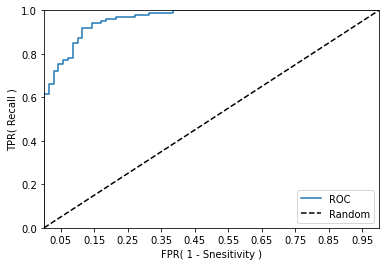

In [56]:
from sklearn.metrics import roc_curve

# predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1사이의 값으로 돌려줌 / 해당 함수를 사용해 클래스 레이블(정답)을 예측
# 레이블 값이 1일 떄, 예측확률을 추출
# pre는 예측 확률을 반환 / decision은 모델이 학습한 선형 방정식의 출력을 반환 
pred_sgd_target = sgd_model.decision_function(X_test)
pred_sgd_target

# FPR(1 - 특이도(실제음성비율)) TPR(민감도:실제 양성 비율) 임계값 설정
fprs, tprs, thresholds = roc_curve(y_test, pred_sgd_target)
print("반환된 분류 결정 임곗값 배열의 shape : ", thresholds.shape)

# 반환된 임계값 배열 row를 샘플로 추출 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기위해 np.arange는 1부터 시작
thr_index = np.arange(1,thresholds.shape[0])
pd.DataFrame({'index':thr_index,'FPR':fprs[thr_index],'TPR':tprs[thr_index]})

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--',label='Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2)) # x축의 눈금 범위
    plt.xlim(0, 1) # x축 시작값과 끝값
    plt.ylim(0, 1) # y축 시작값과 끝값
    plt.xlabel('FPR( 1 - Snesitivity )') # x축 레이블명
    plt.ylabel('TPR( Recall )') # y축 레이블명
    plt.legend() # 범례
    
roc_curve_plot(y_test, pred_sgd_target)

In [57]:
from sklearn.metrics import roc_auc_score

pred_proba_sgd = sgd_model.decision_function(X_test)
roc_score_sgd = roc_auc_score(y_test, pred_proba_sgd)
print('ROC AUC Score: ', roc_score_sgd)

ROC AUC Score:  0.9628005657708629


##### 로지스틱 회귀분석

반환된 분류 결정 임곗값 배열의 shape :  (18,)


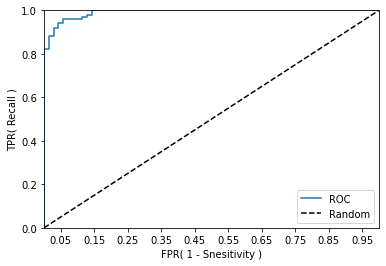

In [58]:
from sklearn.metrics import roc_curve

# predict_proba 함수는 각 샘플에 대해 어느 클래스에 속할 확률을 0에서 1사이의 값으로 돌려줌 / 해당 함수를 사용해 클래스 레이블(정답)을 예측
# 레이블 값이 1일 떄, 예측확률을 추출

pred_logistic_target = logistic_model.predict_proba(X_test)[:,1]
pred_logistic_target

# FPR(1 - 특이도(실제음성비율)) TPR(민감도:실제 양성 비율) 임계값 설정
fprs, tprs, thresholds = roc_curve(y_test, pred_logistic_target)
print("반환된 분류 결정 임곗값 배열의 shape : ", thresholds.shape)

# 반환된 임계값 배열 row를 샘플로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기위해 np.arange는 1부터 시작
thr_index = np.arange(1,thresholds.shape[0])
pd.DataFrame({'index':thr_index,'FPR':fprs[thr_index],'TPR':tprs[thr_index]})

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--',label='Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2)) # x축의 눈금 범위
    plt.xlim(0, 1) # x축 시작값과 끝값
    plt.ylim(0, 1) # y축 시작값과 끝값
    plt.xlabel('FPR( 1 - Snesitivity )') # x축 레이블명
    plt.ylabel('TPR( Recall )') # y축 레이블명
    plt.legend() # 범례
    
roc_curve_plot(y_test, pred_logistic_target)

In [59]:
from sklearn.metrics import roc_auc_score

pred_proba_log = logistic_model.predict_proba(X_test)[:,1]
roc_score_log = roc_auc_score(y_test, pred_proba_log)
print('ROC AUC Score: ', roc_score_log)

ROC AUC Score:  0.9908062234794909


### AUC 점수를 토대로 각 모델을 비교해 보았을때, 랜덤포레스트가 가장 높은 정확도를 보임

In [60]:
print('의사결정트리_AUC Score: %0.3f' %roc_score_tree)
print('랜덤 포레스트_AUC Score: %0.3f' %roc_score_rf)
print('서포트 벡터 머신_AUC Score: %0.3f' %roc_score_svm)
print('확률적 경사 하강법_AUC Score: %0.3f' %roc_score_sgd)
print('로지스틱 회귀분석_AUC Score: %0.3f' %roc_score_log)

의사결정트리_AUC Score: 0.894
랜덤 포레스트_AUC Score: 0.991
서포트 벡터 머신_AUC Score: 0.965
확률적 경사 하강법_AUC Score: 0.963
로지스틱 회귀분석_AUC Score: 0.991


# ----------------------------유방암 데이터 종료-----------------------------